# WHO Suicide Statistics Analysis

---

## Context

This file is the homework practice from my university course "Fundamentals of data analytics".
This dataset is the basic historical (1979-2016) data of suicide from WHO.
Below are the cover of my analysis.

## Source

[Dataset](https://www.kaggle.com/szamil/who-suicide-statistics) - from Szamil - kaggle.com

## License

From original author said, the dataset is belongs to WHO. IT is covered by [WHO copyright notice](https://www.who.int/about/copyright/en/).

This file is for educational purpose only (Data Analysis homework practice). It cannot used in conjunction with commercial purposes.

---

## Homework requirement

* Try a dataset in [kaggle.com](https://www.kaggle.com).
* Apply it with numpy, pandas, matplotlib, etc.
* Write anything you found in this dataset.

---

## Import Library And Dataset

Import Library

In [1]:
# Basic data frame library
import numpy as np
import pandas as pd
import scipy as sp

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

Import Dataset

In [2]:
dataset = pd.read_csv('input/who_suicide_statistics.csv')
dataset.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


---

## Basic dataset info

Below shows the size and the paticipate country of the dataset.

In [3]:
print("How many data is in the dataset:", dataset["country"].count())
print("How many country is in the dataset:", dataset["country"].nunique())

How many data is in the dataset: 43776
How many country is in the dataset: 141


Below shows the basic info of the data. You can see that the data is collected from 1979 to 2016 by the row min and max from the column year.

In [4]:
dataset.describe()

,year,suicides_no,population
count,43776.000000,41520.000000,3.831600e+04
mean,1998.502467,193.315390,1.664091e+06
std,10.338711,800.589926,3.647231e+06
min,1979.000000,0.000000,2.590000e+02
25%,1990.000000,1.000000,8.511275e+04
50%,1999.000000,14.000000,3.806550e+05
75%,2007.000000,91.000000,1.305698e+06
max,2016.000000,22338.000000,4.380521e+07


Below shows the NaN value in the dataset.

Since it has some value not recorded in the dataset, we will use 0 to replace it.

In [5]:
dataset.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64

In [6]:
dataset.fillna(0, inplace=True);
dataset.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

---

## Before we operate

Add the column "percentage" to the dataset to show the percentage of the specific data. To reduce error raise, this value is recorded as -1 if the population is less than or equal to 0.

In [7]:
def percentage(dataset):
    suicides_no = dataset["suicides_no"]
    population = dataset["population"]
    if population <= 0: # Invalid
        return -1
    else:
        return suicides_no / population
   
dataset["percentage"] = dataset.apply(percentage, axis=1)

And the normalize dataframe function for heapmap correlation.

In [8]:
def normalize(dataset):
    return (dataset - dataset.mean()) / (dataset.max() - dataset.min())

---

## Popular suicide location

Below shows the most popular suicide location in the world.

In [9]:
suicide_dataset = dataset.loc[:,["country", "suicides_no", "percentage"]]

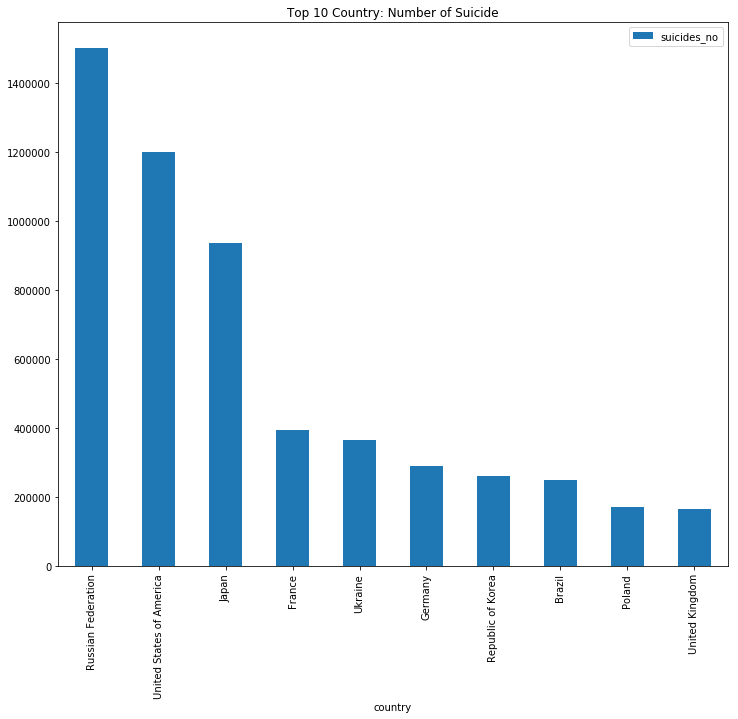

In [10]:
suicide = pd.DataFrame(suicide_dataset.groupby(["country"])["suicides_no"].sum())
suicide.sort_values(by="suicides_no", ascending=False, inplace=True)

suicide.head(10).plot(kind="bar", title="Top 10 Country: Number of Suicide", figsize=(12,10))

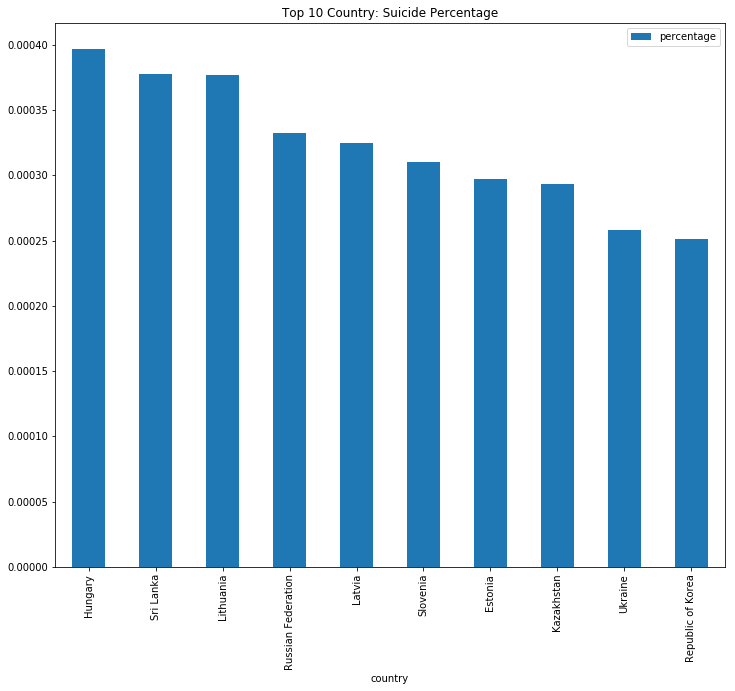

In [11]:
suicide_percent = pd.DataFrame(suicide_dataset.groupby(["country"])["percentage"].mean())
suicide_percent.sort_values(by="percentage", ascending=False, inplace=True)

suicide_percent.head(10).plot(kind="bar", title="Top 10 Country: Suicide Percentage", figsize=(12,10))

Finally, show the heatmap of the relation.

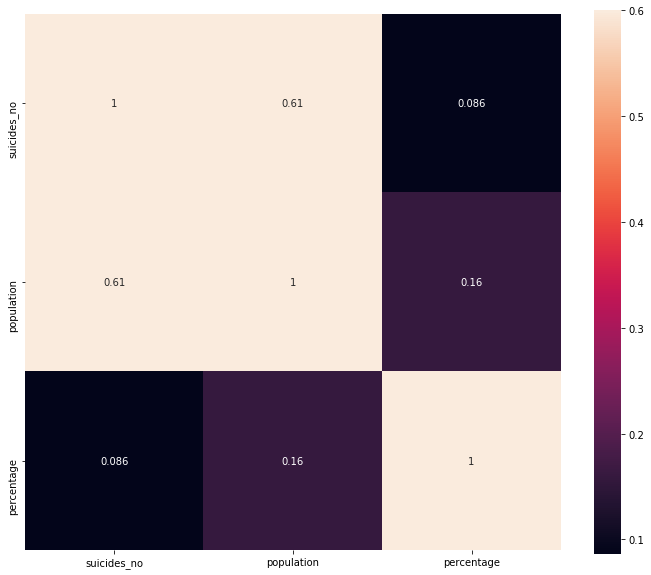

In [12]:
heapmap = dataset.loc[:,["suicides_no", "population", "percentage"]].apply(normalize)

plt.figure(figsize=(12,10))
sns.heatmap(heapmap.corr(), vmax=0.6, square=True, annot=True)

While some large countries like Russia Federation, United States of America is in the top list of the numbers, small country like Hungary, Srilanka is the top percentage in the dataset.

From the heapmap, we can see that the percentage has almost no impact by population and the number of suicide.

> India is not in the dataset. Consider they have the high suicide popularity in the world. It is best to write this message here.
  * [Suicide in India - Wikipedia](https://en.wikipedia.org/wiki/Suicide_in_India)
  * [Suicides in India: What data shows - livemint](https://www.livemint.com/Politics/YCw8vC0qZUzAYkWSEVXS9N/Suicides-in-India-What-data-shows.html)
  * [Gender differentials and state variations in suicide deaths in
India: the Global Burden of Disease Study 1990–2016 - Lancet Public Health 2018](https://www.thelancet.com/pdfs/journals/lanpub/PIIS2468-2667(18)30138-5.pdf)

---

## Suicide location by year

Now sorted with the year variable available.

In [13]:
year_dataset = dataset.loc[:,["country", "year", "suicides_no", "percentage"]]

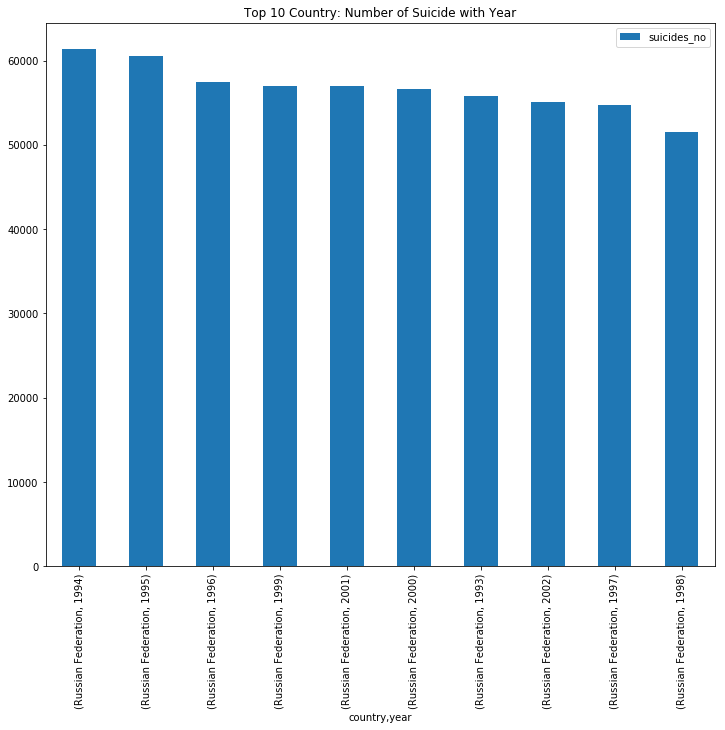

In [14]:
suicide_with_year = pd.DataFrame(year_dataset.groupby(["country","year"])["suicides_no"].sum())
suicide_with_year.sort_values(by="suicides_no", ascending=False, inplace=True)

suicide_with_year.head(10).plot(kind="bar", title="Top 10 Country: Number of Suicide with Year", figsize=(12,10))

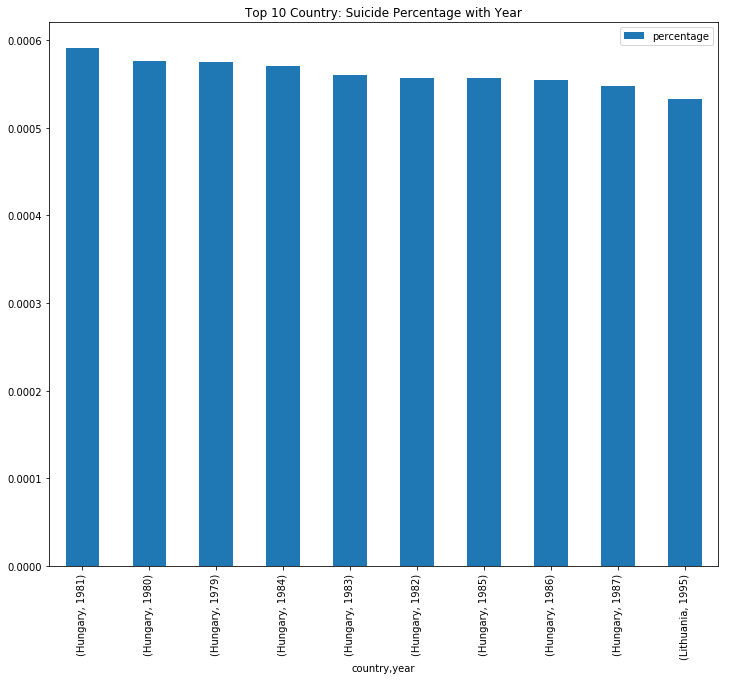

In [15]:
suicide_percent_with_year = pd.DataFrame(year_dataset.groupby(["country","year"])["percentage"].mean())
suicide_percent_with_year.sort_values(by="percentage", ascending=False, inplace=True)

suicide_percent_with_year.head(10).plot(kind="bar", title="Top 10 Country: Suicide Percentage with Year", figsize=(12,10))

And the heap map.

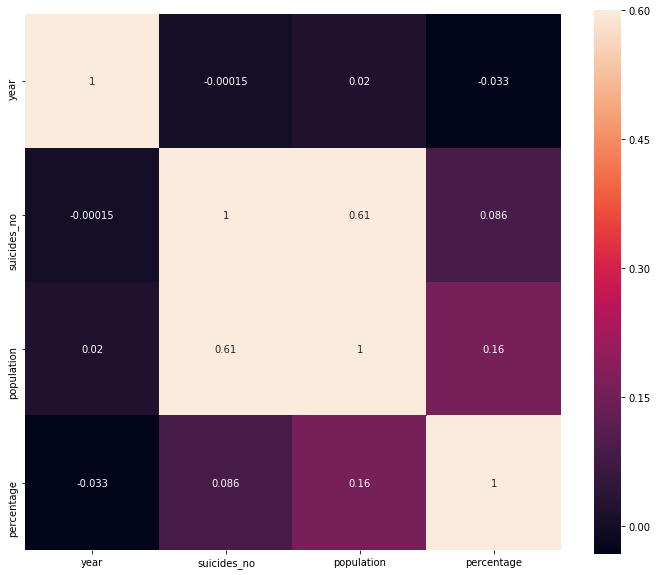

In [16]:
heapmap = dataset.loc[:,["year", "suicides_no", "population", "percentage"]].apply(normalize)

plt.figure(figsize=(12,10))
sns.heatmap(heapmap.corr(), vmax=0.6, square=True, annot=True)

It seems like the suicide factor is not affected by year.

---

## Gender suicide difference

We have shown that the country with year difference. Now we can show how gender difference can affect the data.

In [17]:
gender_dataset = dataset.loc[:,["country", "sex", "suicides_no", "percentage"]]

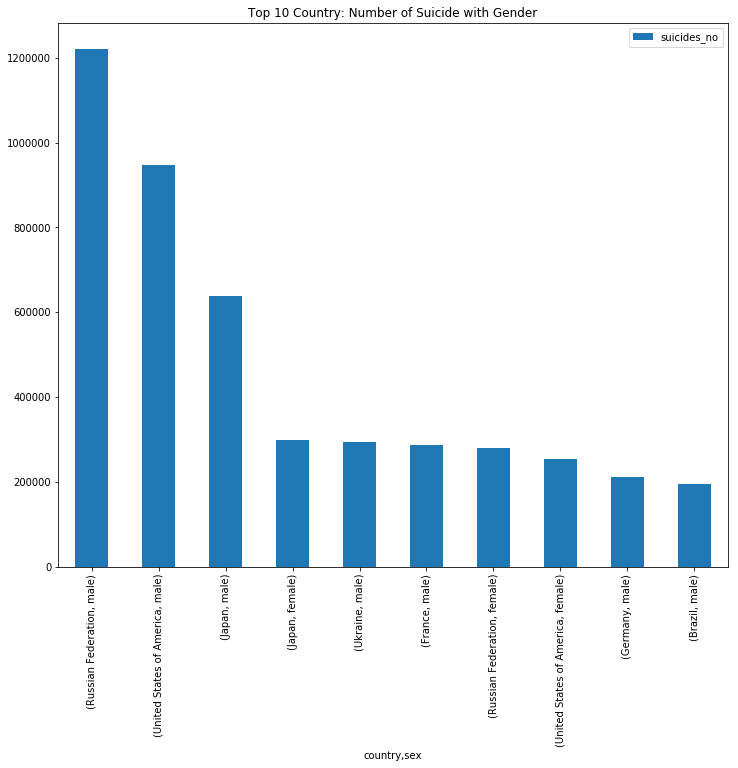

In [18]:
suicide_with_gender = pd.DataFrame(gender_dataset.groupby(["country", "sex"])["suicides_no"].sum())
suicide_with_gender.sort_values(by="suicides_no", ascending=False, inplace=True)

suicide_with_gender.head(10).plot(kind="bar", title="Top 10 Country: Number of Suicide with Gender", figsize=(12,10))

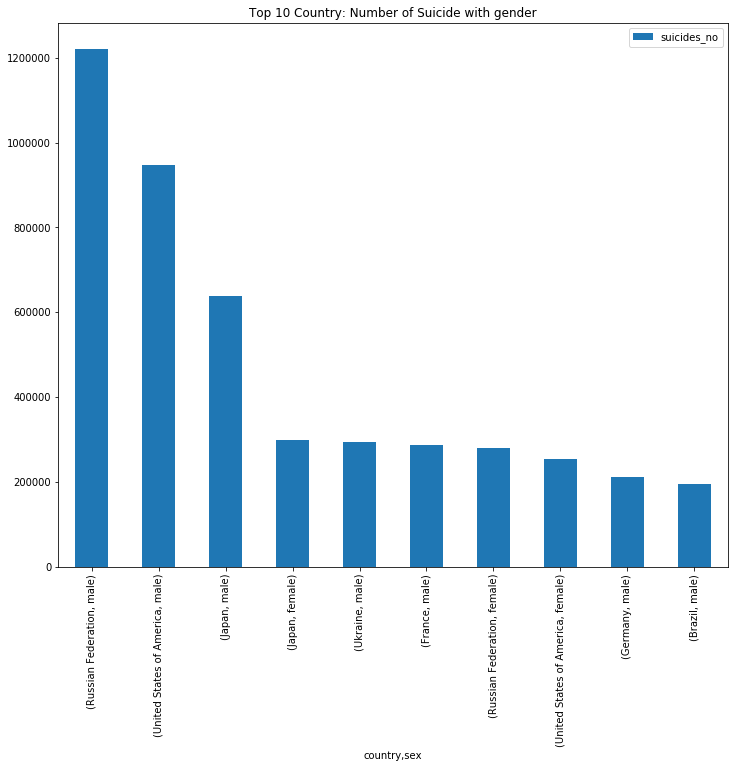

In [19]:
suicide_percent_with_gender = pd.DataFrame(gender_dataset.groupby(["country", "sex"])["suicides_no"].sum())
suicide_percent_with_gender.sort_values(by="suicides_no", ascending=False, inplace=True)

suicide_percent_with_gender.head(10).plot(kind="bar", title="Top 10 Country: Number of Suicide with gender", figsize=(12,10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BF58EC4E0>],
      dtype=object)

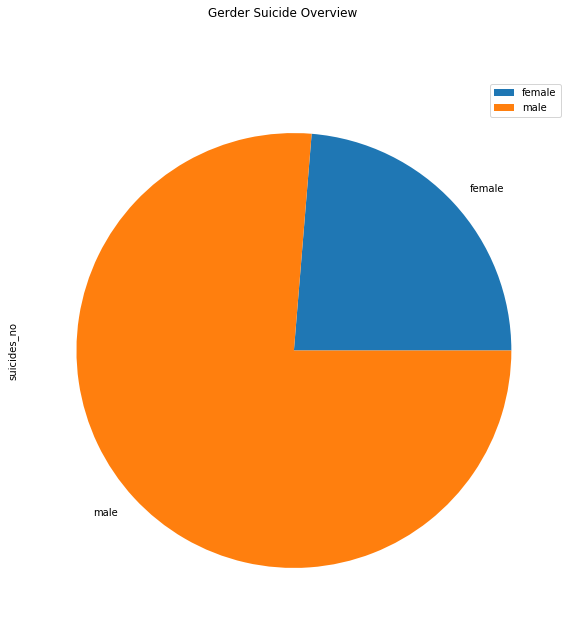

In [20]:
gender_overview = pd.DataFrame(gender_dataset.groupby(["sex"])["suicides_no"].sum())

gender_overview.plot(kind="pie", subplots=True, figsize=(12,10), title="Gerder Suicide Overview")

In [21]:
gender_year_dataset = dataset.loc[:,["year", "sex", "suicides_no"]]
gender_year = pd.DataFrame(gender_year_dataset.groupby(["sex", "year"])["suicides_no"].sum())
gender_year.head(10)

suicides_no
sex    year             
female 1979      29418.0
       1980      42662.0
       1981      47530.0
       1982      47681.0
       1983      34823.0
       1984      34811.0
       1985      50417.0
       1986      51517.0
       1987      50251.0
       1988      48518.0

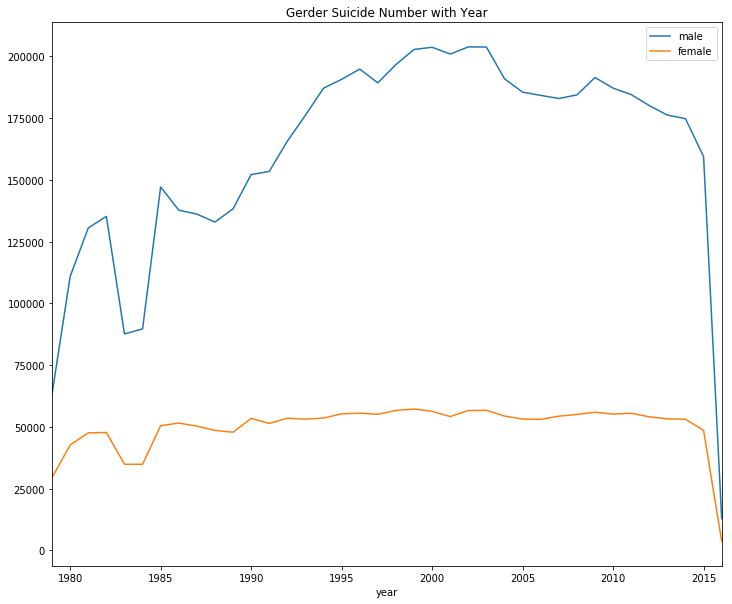

In [22]:
male = gender_year.loc[["male"],:].reset_index()
female = gender_year.loc[["female"],:].reset_index()
ax = plt.gca()

male.plot(kind="line", x="year", y="suicides_no", ax=ax, subplots=False, figsize=(12,10), label="male")
female.plot(kind="line", x="year", y="suicides_no", ax=ax, subplots=False, figsize=(12,10),  label="female")
ax.set_title("Gerder Suicide Number with Year")
plt.show()

From the dataset, it seems that male commit more suicide.

---

## Specific suicide timeline - take South Korea for instance

South Korea has been known for high suicide rate. Let see what we can get from the dataset.

source:
* [Suicide in South Korea - Wikipedia](https://en.wikipedia.org/wiki/Suicide_in_South_Korea)
* [Suicide No. 1 cause of death for S. Korean teens, youths - The Korea Herald](http://www.koreaherald.com/view.php?ud=20180426000581)
* [South Korea – The Suicide Capital of the World - Beyond Hallyu](http://beyondhallyu.com/culture/south-korea-the-suicide-capital-of-the-world/)

In [23]:
korea_dataset = dataset[dataset["country"] == "Republic of Korea"]
korea_dataset.drop("country", axis=1)

korea_dataset.head()

,country,year,sex,age,suicides_no,population,percentage
31332,Republic of Korea,1985,female,15-24 years,296.0,4148300.0,0.000071
31333,Republic of Korea,1985,female,25-34 years,228.0,3568800.0,0.000064
31334,Republic of Korea,1985,female,35-54 years,262.0,4267400.0,0.000061
31335,Republic of Korea,1985,female,5-14 years,13.0,4056400.0,0.000003
31336,Republic of Korea,1985,female,55-74 years,161.0,2000500.0,0.000080


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000016BF5AE6320>],
      dtype=object)

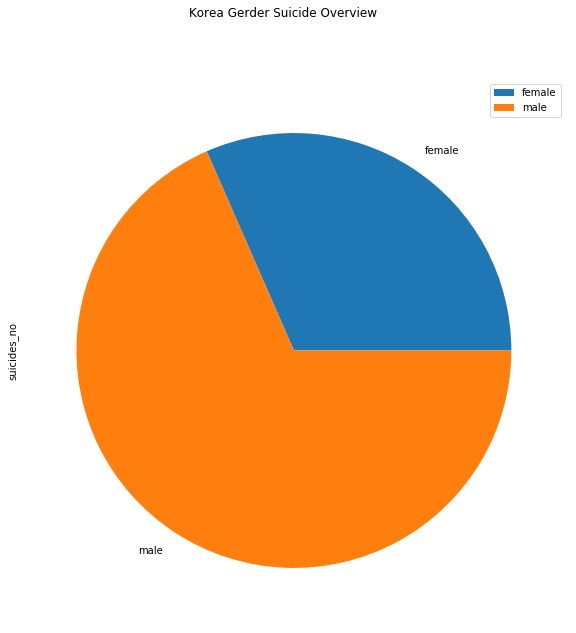

In [24]:
korea_gender_dataset = korea_dataset.loc[:,["sex", "suicides_no"]]
korea_gender = pd.DataFrame(korea_gender_dataset.groupby(["sex"])["suicides_no"].sum())
korea_gender.plot(kind="pie", subplots=True, figsize=(12,10), title="Korea Gerder Suicide Overview")

This pie chart shows that the male suicide numbers is higher than female.

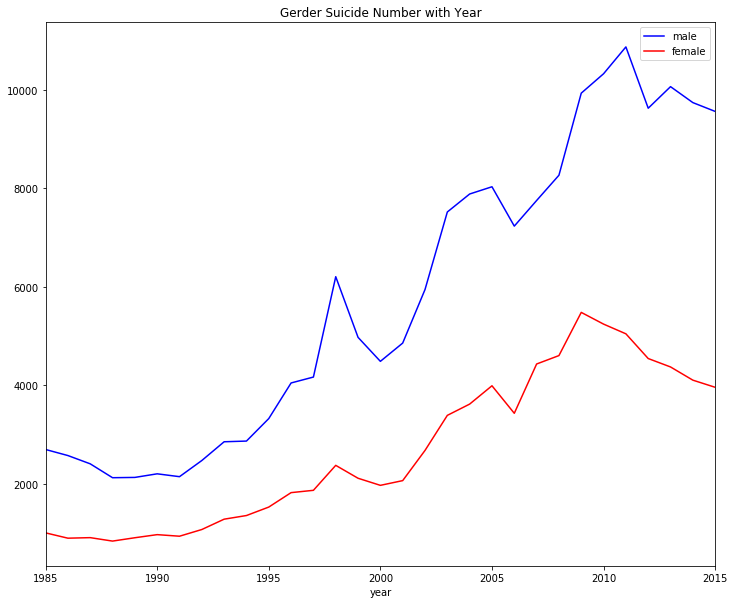

In [25]:
korea_gender_year_dataset = korea_dataset.loc[:,["sex", "year", "suicides_no"]]
korea_gender_year = pd.DataFrame(korea_gender_year_dataset.groupby(["sex", "year"])["suicides_no"].sum())

male_korea = korea_gender_year.loc[["male"],:].reset_index()
female_korea = korea_gender_year.loc[["female"],:].reset_index()

ax = plt.gca()
male_korea.plot(kind="line", x="year", y="suicides_no", ax=ax,
          subplots=False, figsize=(12,10), label="male", color="blue")
female_korea.plot(kind="line", x="year", y="suicides_no", ax=ax, subplots=False, 
            figsize=(12,10),  label="female", color="red")
ax.set_title("Gerder Suicide Number with Year")
plt.show()

The line chart shows that the suicide number has been increasing over the years. After 2010, the rate has drop a bit.

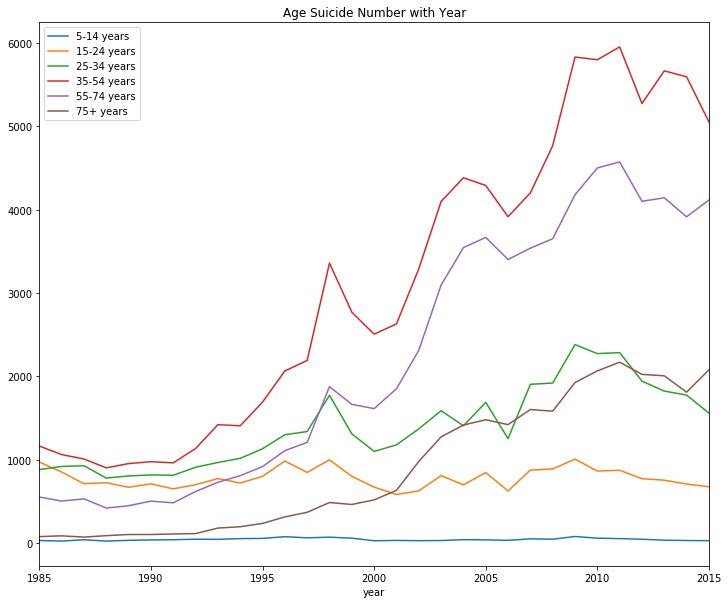

In [26]:
korea_age_dataset = korea_dataset.loc[:,["age", "year", "suicides_no"]]
korea_age = pd.DataFrame(korea_age_dataset.groupby(["age", "year"])["suicides_no"].sum())

age_label = ["5-14 years",
             "15-24 years", 
             "25-34 years", 
             "35-54 years", 
             "55-74 years", 
             "75+ years"]

age_list = [korea_age.loc[[age_label[x]],:].reset_index() for x in range(len(age_label))]

ax = plt.gca()

for i, data in enumerate(age_list):
    data.plot(kind="line", x="year", y="suicides_no", ax=ax,
          subplots=False, figsize=(12,10), label=age_label[i])

ax.set_title("Age Suicide Number with Year")
plt.show()

The majority of the suicide population is adult.

Notice the elderly has a extremely high suicide rate in this data. In South Korea, many elderly people kill themselves for reducing their family burden since the welfare system is bad.(1)

Be wary of the peek in year 1997-1998. It is caused by [Asian financial crisis](https://en.wikipedia.org/wiki/1997_Asian_financial_crisis). A study has shown that the economic downfall has a correlation in suicide rate in South Korea.(2)

source: 
* (1) [No Country for Old People: South Korea’s Dire Problem of Elderly Poverty - KOREA EXPOSÉ](https://www.koreaexpose.com/no-country-for-old-people/)
* (2) [Was the Economic Crisis 1997–1998 Responsible for Rising Suicide Rates in East/Southeast Asia? A Time–trend Analysis for Japan, Hong Kong, South Korea, Taiwan, Singapore and Thailand - Shu-Sen Chang, David Gunnell, Jonathan A.C.Sterne, Tsung-Hsueh Luc, Andrew T.A. Cheng](https://doi.org/10.1016/j.socscimed.2009.01.010)